In [15]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
from custom_transforms.transforms import *
from statsmodels.tsa.stattools import adfuller
from scripts.load_data import load_weather_df, load_price_df
from datetime import timedelta

In [16]:
#Load and merge data

price_df = load_price_df('../processed_data/prices-2016-2024.csv')
weather_df = load_weather_df('../processed_data/weather_2016_2023.csv')
weather_df_resampled = weather_df.resample('W').mean()
weather_df_resampled["first_day_week"] = (weather_df_resampled.index - weather_df_resampled.index.weekday * timedelta(days=1))
price_weather_weekly_df = pd.merge(price_df, weather_df_resampled, on='first_day_week', how='left')
price_weather_weekly_df.index = price_df.index
price_weather_weekly_df = price_weather_weekly_df.drop(columns=['first_day_week'])
weather_df_resampled = weather_df_resampled.drop(columns=['first_day_week'])

In [17]:
#Transform data
for col in weather_df.columns:
    price_weather_weekly_df[f'{col}_mean'] = weather_df[col].resample('W').mean()#.rolling(window=4).mean()
    price_weather_weekly_df[f'{col}_max'] = weather_df[col].resample('W').max()#.rolling(window=4).mean()
    price_weather_weekly_df[f'{col}_std'] = weather_df[col].resample('W').std()#.rolling(window=4).mean()
    #price_weather_weekly_df[f'{col}_min'] = weather_df[col].resample('W').min()
    #price_weather_weekly_df[f'{col}_std'] = weather_df[col].resample('W').std()
    #price_weather_weekly_df[f'{col}_median'] = weather_df[col].resample('W').median()
    #price_weather_weekly_df[f'{col}_var'] = weather_df[col].resample('W').var()
    
    price_weather_weekly_df.drop(columns=[col], inplace=True)
    price_weather_weekly_df = price_weather_weekly_df.copy()

price_weather_weekly_df

,Alface Americana - Roça,Alface Crespa - Roça,Alface Lisa - Roça,Alface Americana - Atacado,Alface Crespa - Atacado,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_mean","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_max","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_sum","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)_mean","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)_max",...,"UMIDADE RELATIVA DO AR, HORARIA (%)_sum","VENTO, DIREÇÃO HORARIA (gr) (° (gr))_mean","VENTO, DIREÇÃO HORARIA (gr) (° (gr))_max","VENTO, DIREÇÃO HORARIA (gr) (° (gr))_sum","VENTO, RAJADA MAXIMA (m/s)_mean","VENTO, RAJADA MAXIMA (m/s)_max","VENTO, RAJADA MAXIMA (m/s)_sum","VENTO, VELOCIDADE HORARIA (m/s)_mean","VENTO, VELOCIDADE HORARIA (m/s)_max","VENTO, VELOCIDADE HORARIA (m/s)_sum"
dt,,,,,,,,,,,,,,,,,,,,,
2016-04-24 00:00:00+00:00,0.592500,0.616500,0.618000,NaN,NaN,0.000000,0.0,0.000000,907.386111,909.8,...,15.585740,219.597222,316.0,67.593787,1.976389,6.8,2.118363,0.140278,1.9,0.379273
2016-05-01 00:00:00+00:00,1.000000,0.426111,0.500000,NaN,NaN,0.145238,2.4,0.342378,905.865476,910.8,...,16.807086,174.041667,358.0,121.252809,3.461905,9.3,2.617212,0.521429,3.2,0.788552
2016-05-08 00:00:00+00:00,1.041667,0.437778,0.479444,NaN,NaN,0.021429,1.0,0.121932,909.642262,912.3,...,11.935836,197.541667,358.0,81.454286,1.684524,6.5,2.110651,0.204762,3.0,0.502546
2016-05-15 00:00:00+00:00,1.055833,0.430556,0.430556,NaN,NaN,0.215476,4.0,0.716277,909.359524,913.8,...,11.698436,189.976190,360.0,103.919761,2.242262,10.8,2.705981,0.270238,3.3,0.673320
2016-05-22 00:00:00+00:00,0.764167,0.444444,0.398333,NaN,NaN,0.115476,4.8,0.565896,908.848810,914.1,...,12.743416,208.922619,360.0,95.389965,3.440476,13.4,3.380345,0.574405,4.2,0.996280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-03 00:00:00+00:00,1.875000,0.750000,0.750000,1.0,0.5,0.077381,5.2,0.490730,905.600595,910.5,...,10.513201,183.988095,355.0,85.363992,4.221131,14.2,2.409827,1.291071,4.3,0.784476
2023-12-10 00:00:00+00:00,1.458333,0.677083,0.677083,1.0,0.5,0.697619,28.2,2.583595,906.600000,910.2,...,12.848327,154.059524,360.0,101.985364,3.461310,8.9,1.642509,0.982738,2.0,0.439787
2023-12-17 00:00:00+00:00,1.125000,0.562500,0.562500,1.0,0.5,0.347619,28.2,2.252901,906.604464,910.0,...,14.180544,186.979167,356.0,90.930657,3.731845,8.4,1.646557,1.075595,2.7,0.531465


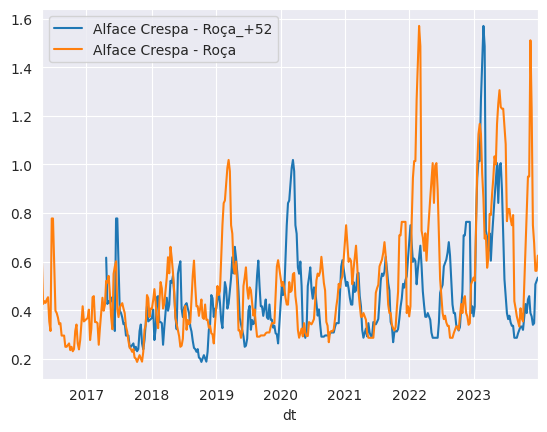

In [18]:
#plot correlation matrix

def add_shifted_column(shift_amount, col_name, df, neg=True):
    added_cols = []
    for i in range(1, shift_amount+1):
        _i = -i if neg else i
        df[f'{col_name}_{_i}'] = df[col_name].shift(_i).rolling(window=4).mean()
        added_cols.append(f'{col_name}_{_i}')
        
    return added_cols

interest_cols = ['Alface Crespa - Roça']
added_shifted_cols = add_shifted_column(12, "Alface Crespa - Roça", price_weather_weekly_df)
interest_cols.extend(added_shifted_cols)

price_weather_weekly_df["Alface Crespa - Roça_+49"] = price_weather_weekly_df["Alface Crespa - Roça"].shift(49)
price_weather_weekly_df["Alface Crespa - Roça_+50"] = price_weather_weekly_df["Alface Crespa - Roça"].shift(50)
price_weather_weekly_df["Alface Crespa - Roça_+51"] = price_weather_weekly_df["Alface Crespa - Roça"].shift(51)
price_weather_weekly_df["Alface Crespa - Roça_+52"] = price_weather_weekly_df["Alface Crespa - Roça"].shift(52)
price_weather_weekly_df["Alface Crespa - Roça_+53"] = price_weather_weekly_df["Alface Crespa - Roça"].shift(53)
#add_shifted_column(12, "Alface Lisa - Roça", price_weather_weekly_df)
#add_shifted_column(12, "Alface Americana - Roça", price_weather_weekly_df)
#price_weather_weekly_df["TEMPERATURA DO PONTO DE ORVALHO (°C)_+8"] = price_weather_weekly_df["TEMPERATURA DO PONTO DE ORVALHO (°C)"].shift(8)

price_weather_weekly_df[["Alface Crespa - Roça_+52", 'Alface Crespa - Roça']].plot()
plt.show()

In [19]:
cor = price_weather_weekly_df.corr(method="spearman")
price_weather_weekly_df

,Alface Americana - Roça,Alface Crespa - Roça,Alface Lisa - Roça,Alface Americana - Atacado,Alface Crespa - Atacado,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_mean","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_max","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_sum","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)_mean","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)_max",...,Alface Crespa - Roça_-8,Alface Crespa - Roça_-9,Alface Crespa - Roça_-10,Alface Crespa - Roça_-11,Alface Crespa - Roça_-12,Alface Crespa - Roça_+49,Alface Crespa - Roça_+50,Alface Crespa - Roça_+51,Alface Crespa - Roça_+52,Alface Crespa - Roça_+53
dt,,,,,,,,,,,,,,,,,,,,,
2016-04-24 00:00:00+00:00,0.592500,0.616500,0.618000,NaN,NaN,0.000000,0.0,0.000000,907.386111,909.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-01 00:00:00+00:00,1.000000,0.426111,0.500000,NaN,NaN,0.145238,2.4,0.342378,905.865476,910.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-08 00:00:00+00:00,1.041667,0.437778,0.479444,NaN,NaN,0.021429,1.0,0.121932,909.642262,912.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-15 00:00:00+00:00,1.055833,0.430556,0.430556,NaN,NaN,0.215476,4.0,0.716277,909.359524,913.8,...,0.635486,0.538264,0.436458,0.375139,0.362361,NaN,NaN,NaN,NaN,NaN
2016-05-22 00:00:00+00:00,0.764167,0.444444,0.398333,NaN,NaN,0.115476,4.8,0.565896,908.848810,914.1,...,0.538264,0.436458,0.375139,0.362361,0.339167,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-03 00:00:00+00:00,1.875000,0.750000,0.750000,1.0,0.5,0.077381,5.2,0.490730,905.600595,910.5,...,NaN,NaN,NaN,NaN,NaN,0.520833,0.507083,0.347083,0.340417,0.375000
2023-12-10 00:00:00+00:00,1.458333,0.677083,0.677083,1.0,0.5,0.697619,28.2,2.583595,906.600000,910.2,...,NaN,NaN,NaN,NaN,NaN,0.534583,0.520833,0.507083,0.347083,0.340417
2023-12-17 00:00:00+00:00,1.125000,0.562500,0.562500,1.0,0.5,0.347619,28.2,2.252901,906.604464,910.0,...,NaN,NaN,NaN,NaN,NaN,0.520833,0.534583,0.520833,0.507083,0.347083


In [20]:
import functools

reduced_cor = cor[interest_cols]
transposed_cor = reduced_cor.transpose()

#sum values of all columns
sum = transposed_cor.mean(axis=0)
sum

sum_df = pd.DataFrame()
stats_dict = {'columns': transposed_cor.columns.tolist(), 'mean': [], 'max': []}

for col in transposed_cor.columns:
    stats_dict['mean'].append(transposed_cor[col].apply(abs).mean())
    stats_dict['max'].append(transposed_cor[col].apply(abs).max())
    

pd.DataFrame(stats_dict)

,columns,mean,max,std
0,Alface Americana - Roça,0.535699,0.864656,0.266692
1,Alface Crespa - Roça,0.582924,1.000000,0.321545
2,Alface Lisa - Roça,0.581249,0.970696,0.304342
3,Alface Americana - Atacado,NaN,NaN,NaN
4,Alface Crespa - Atacado,NaN,NaN,NaN
...,...,...,...,...
68,Alface Crespa - Roça_+49,0.342411,0.415891,0.062188
69,Alface Crespa - Roça_+50,0.329447,0.415891,0.067569
70,Alface Crespa - Roça_+51,0.312076,0.411033,0.066874
71,Alface Crespa - Roça_+52,0.293853,0.394981,0.064043



### Highest correlations of each group

"Alface Americana - Roça",0.535699,0.864656
"Alface Lisa - Roça",0.581249,0.970696
"TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)_max",0.342270,0.443879
"PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)_max",0.344404,0.433358
"Alface Crespa - Roça_+50",0.329447,0.415891
"Alface Crespa - Roça_+49",0.342411,0.415891
"Alface Crespa - Roça_+51",0.312076,0.411033
"RADIACAO GLOBAL (Kj/m²)_max",0.217891,0.397538
"Alface Crespa - Roça_+52",0.293853,0.394981
"Alface Crespa - Roça_+53",0.275425,0.371779
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_max",0.239047,0.317160
"VENTO, VELOCIDADE HORARIA (m/s)_max",0.228239,0.299120
"UMIDADE RELATIVA DO AR, HORARIA (%)_max",0.193499,0.248678
"VENTO, DIREÇÃO HORARIA (gr) (° (gr))_max",0.179559,0.192340

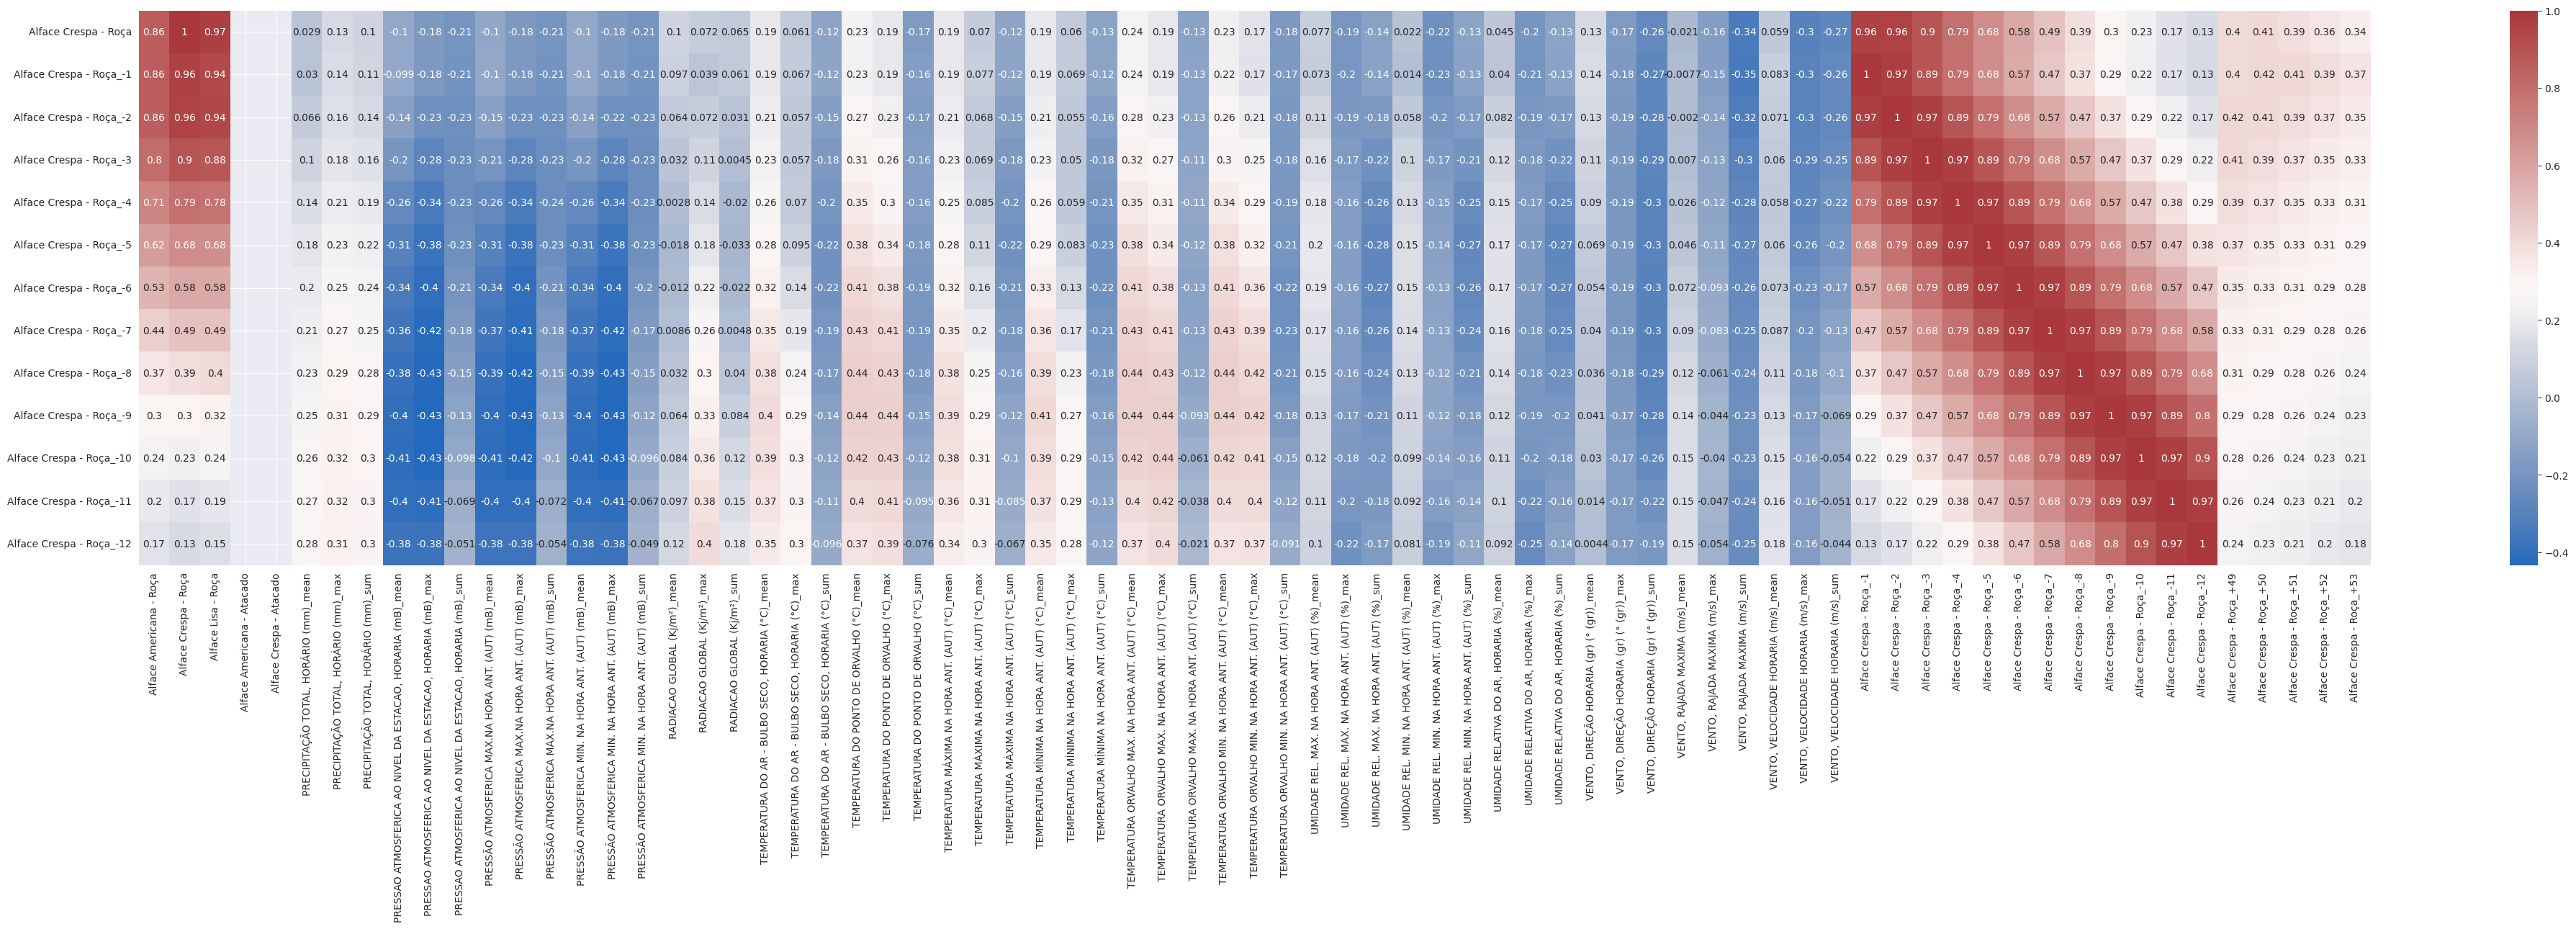

In [21]:
plt.figure(figsize=(50, 10))
sns.heatmap(cor[interest_cols].transpose(),  cmap=sns.color_palette("vlag", as_cmap=True), annot=True)
#plt.show()
plt.savefig('correlation2.png', bbox_inches = 'tight')